# Linear Regression on Lagos Rent Data

Below is a linear regression on Lagos rent data. Data was gathered from this [url](https://nigeriapropertycentre.com/for-rent/flats-apartments/lagos/showtype?bedrooms=2). On the site the following filter was applied:
* House type: 2 bedroom apartment
* Location: Lagos
* Acquisition style: Rent

Further reports at the end of the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pred = pd.read_csv('lagos_book1.csv')

In [3]:
pred.head()

,title,location,price,advertiser
0,Luxury 2 Bedroom Apartment With Excellent Faci...,Lekki,2000000,['Real']
1,Nicely Built 24 Hours 2 Bedroom Flat,Lekki,3000000,['Joe']
2,Brand New Serviced 2-bedroom Flat,Lekki,1800000,['Joe']
3,Well Built To Taste 2 Bedrooms,Ajah,900000,['Elderkay']
4,Tastefully Finished One (2) Bedroom Flat,Ikeja,2000000,['Leeward']


In [4]:
pred.location.unique()

array(['Lekki', 'Ajah', 'Ikeja', 'Yaba', 'Agege', 'Alimosho', 'Isolo',
       'Magodo', 'Ibeju', 'Ikorodu', 'Ikoyi', 'VI', 'Ketu', 'Ojo',
       'Gbagada', 'Surulere', 'Shomolu', 'Berger', 'Ojota'], dtype=object)

In [5]:
pred.location.describe()

count       999
unique       19
top       Lekki
freq        355
Name: location, dtype: object

In [6]:
pred.describe()

,price
count,9.990000e+02
mean,1.934499e+06
std,2.329891e+06
min,1.000000e+05
25%,7.500000e+05
50%,1.200000e+06
75%,2.000000e+06
max,2.200000e+07


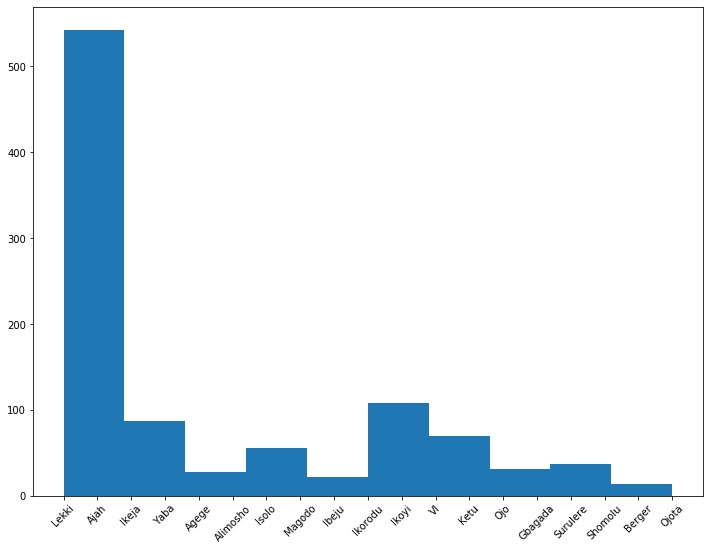

In [7]:
# visualising the data
plt.figure(figsize=(12,9))
plt.hist(pred.location)
plt.xticks(rotation=45)
plt.show()

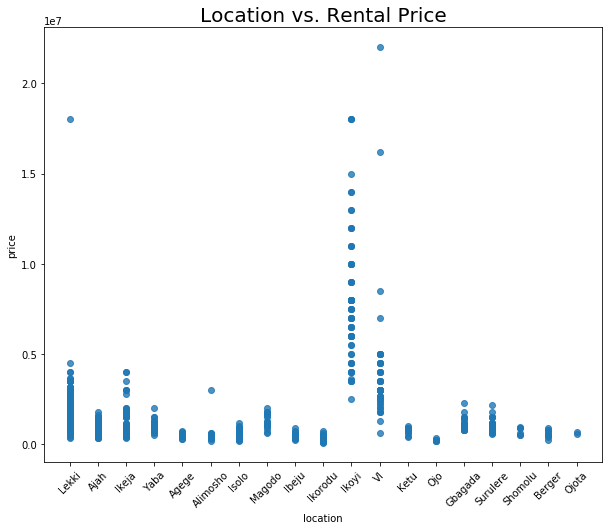

In [8]:
# creating a regression plot
#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(pred.location, pred.price, fit_reg=False)
plt.xticks(rotation=45)
plt.title('Location vs. Rental Price', fontsize = 20)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [15]:
X = np.array(pred.location)
y = np.array(pred.price)

# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
X = one_hot.fit_transform(X)

In [17]:
model = LinearRegression(fit_intercept=True)

In [29]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.score(X_test, y_test)

0.7165045925625498

In [23]:
print(model.coef_)
print(model.intercept_)

[-1.37530968e+19 -3.11237003e+19  6.17101169e+18  8.54724302e+19
 -2.01463470e+19  1.96486625e+19  4.08558376e+19  7.17420491e+19
  9.82640013e+18 -1.42231291e+20  1.02410066e+19 -1.18026931e+19
 -5.51971745e+19  2.36465171e+19 -2.34292420e+19 -1.95765222e+19
  7.41583852e+18  1.54021650e+19 -3.86189096e+19 -6.83804464e+19
 -3.55406576e+19  7.64075234e+19 -8.98820004e+19  1.73706035e+19
 -1.68086331e+19  1.18026931e+19 -2.49859650e+19  6.28990657e+17]
5.675886093889687e+19


In [24]:
model.predict(X_test)

array([ 286720.,  868352., 2031616., 2031616.,  704512., 7749632.,
       1523712.,  868352.,  286720., 2031616., 1523712., 2031616.,
        360448.,  704512.,  983040., 3620864., 2031616.,  360448.,
        983040., 3620864.,  868352.,  704512.,  868352., 1523712.,
       2031616., 2031616.,  983040., 2031616., 2031616.,  868352.,
        868352., 2031616.,  704512.,  286720., 7749632.,  868352.,
       1302528.,  557056., 2031616., 1007616., 2031616.,  868352.,
        450560.,  532480., 2031616., 2031616.,  811008., 2031616.,
        704512., 1302528., 2031616., 2031616., 2031616., 2031616.,
        868352., 7749632., 1081344.,  868352., 2031616., 2031616.,
        286720., 2031616., 1081344.,  868352., 2031616., 2031616.,
       2031616., 1302528.,  360448., 3620864.,  868352., 2031616.,
        868352.,  868352., 3620864.,  868352., 2031616., 2031616.,
       2031616., 2031616.,  704512., 2031616.,  868352., 2031616.,
        868352., 2031616., 2031616.,  704512.,  868352.,  8683

In [42]:
model.score(X_train, y_train)

0.6090414962202211

In [44]:
model.coef_

array([-1.37530968e+19, -3.11237003e+19,  6.17101169e+18,  8.54724302e+19,
       -2.01463470e+19,  1.96486625e+19,  4.08558376e+19,  7.17420491e+19,
        9.82640013e+18, -1.42231291e+20,  1.02410066e+19, -1.18026931e+19,
       -5.51971745e+19,  2.36465171e+19, -2.34292420e+19, -1.95765222e+19,
        7.41583852e+18,  1.54021650e+19, -3.86189096e+19, -6.83804464e+19,
       -3.55406576e+19,  7.64075234e+19, -8.98820004e+19,  1.73706035e+19,
       -1.68086331e+19,  1.18026931e+19, -2.49859650e+19,  6.28990657e+17])

In [45]:
model.intercept_

5.675886093889687e+19

### y = mx + c
### y = coef * x + 5.67588

**My coefficient turned out multiply weird because y is dependent on X. And my X turned out to be a categorical variable. When HotEncoded, I ended up with multiple values of X. Why 28 instead of just 19? (That's the next journey of me)**

## What we have achieved:
* Imported 1000 datasets on Lagos rent
* Checked for unique locations in our locations
* Described our dataset (there was no null data check and duplication because data was already preprocessed in excel)
* Visualized the data to see what it looks like
* Performed a regplot to display the spread of our data

### For the LinearRegression:
* Setup our model
* Declare our variables
* HotEncode our category variable
* Fit our model
* Train, test and get our coefficients.